# Project: Travel Review Segmentation

# Algorithm : hierarchical clustering
# Dataset: google_review_ratings

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read The Data Using Pandas

In [6]:
df=pd.read_csv('google_review_ratings.csv')
pd.set_option('max_columns',50)

In [7]:
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


# Renaming the Columns

In [8]:
df.rename(columns = {'Category 1':'Category_1'}, inplace = True)
df.rename(columns = {'Category 2':'Category_2'}, inplace = True)
df.rename(columns = {'Category 3':'Category_3'}, inplace = True)
df.rename(columns = {'Category 4':'Category_4'}, inplace = True)
df.rename(columns = {'Category 5':'Category_5'}, inplace = True)
df.rename(columns = {'Category 6':'Category_6'}, inplace = True)
df.rename(columns = {'Category 7':'Category_7'}, inplace = True)
df.rename(columns = {'Category 8':'Category_8'}, inplace = True)
df.rename(columns = {'Category 9':'Category_9'}, inplace = True)
df.rename(columns = {'Category 10':'Category_10'}, inplace = True)
df.rename(columns = {'Category 11':'Category_11'}, inplace = True)
df.rename(columns = {'Category 12':'Category_12'}, inplace = True)
df.rename(columns = {'Category 13':'Category_13'}, inplace = True)
df.rename(columns = {'Category 14':'Category_14'}, inplace = True)
df.rename(columns = {'Category 15':'Category_15'}, inplace = True)
df.rename(columns = {'Category 16':'Category_16'}, inplace = True)
df.rename(columns = {'Category 17':'Category_17'}, inplace = True)
df.rename(columns = {'Category 18':'Category_`18'}, inplace = True)
df.rename(columns = {'Category 19':'Category_`19'}, inplace = True)
df.rename(columns = {'Category 20':'Category_20'}, inplace = True)
df.rename(columns = {'Category 21':'Category_21'}, inplace = True)
df.rename(columns = {'Category 22':'Category_22'}, inplace = True)
df.rename(columns = {'Category 23':'Category_23'}, inplace = True)
df.rename(columns = {'Category 24':'Category_24'}, inplace = True)
df.rename(columns = {'Category 25':'Category_25'}, inplace = True)
df.rename(columns = {'Unnamed: 25':'Unnamed_25'}, inplace = True)

In [9]:
df

,User,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_`18,Category_`19,Category_20,Category_21,Category_22,Category_23,Category_24,Unnamed_25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


# Sentiment analysis in a variety of forms

# Exploratory Data Analysis (EDA)

# Check the Datatype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          5456 non-null   object 
 1   Category_1    5456 non-null   float64
 2   Category_2    5456 non-null   float64
 3   Category_3    5456 non-null   float64
 4   Category_4    5456 non-null   float64
 5   Category_5    5456 non-null   float64
 6   Category_6    5456 non-null   float64
 7   Category_7    5456 non-null   float64
 8   Category_8    5456 non-null   float64
 9   Category_9    5456 non-null   float64
 10  Category_10   5456 non-null   float64
 11  Category_11   5456 non-null   object 
 12  Category_12   5455 non-null   float64
 13  Category_13   5456 non-null   float64
 14  Category_14   5456 non-null   float64
 15  Category_15   5456 non-null   float64
 16  Category_16   5456 non-null   float64
 17  Category_17   5456 non-null   float64
 18  Category_`18  5456 non-null 

Data Consists of float64(24), object(2)

# Describe The Dataset

In [11]:
df.describe()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_`18,Category_`19,Category_20,Category_21,Category_22,Category_23,Category_24,Unnamed_25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


# Check for Null

In [12]:
df.isnull().sum()

User               0
Category_1         0
Category_2         0
Category_3         0
Category_4         0
Category_5         0
Category_6         0
Category_7         0
Category_8         0
Category_9         0
Category_10        0
Category_11        0
Category_12        1
Category_13        0
Category_14        0
Category_15        0
Category_16        0
Category_17        0
Category_`18       0
Category_`19       0
Category_20        0
Category_21        0
Category_22        0
Category_23        0
Category_24        1
Unnamed_25      5454
dtype: int64

# Dealing with Null Values

In [16]:
mean_24 = df['Category_24'].mean()
df['Category_24']=df['Category_24'].replace({np.NaN : mean_24})
mean_12= df['Category_12'].mean()
df['Category_12']=df['Category_12'].replace({np.NaN : mean_12})

In [17]:
df.isnull().sum()

User               0
Category_1         0
Category_2         0
Category_3         0
Category_4         0
Category_5         0
Category_6         0
Category_7         0
Category_8         0
Category_9         0
Category_10        0
Category_11        0
Category_12        0
Category_13        0
Category_14        0
Category_15        0
Category_16        0
Category_17        0
Category_`18       0
Category_`19       0
Category_20        0
Category_21        0
Category_22        0
Category_23        0
Category_24        0
Unnamed_25      5454
dtype: int64

Nulls Removed

# Drop the Unwanted Column

In [21]:
df=df.drop('Unnamed_25',axis=1)

In [22]:
df

,User,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_`18,Category_`19,Category_20,Category_21,Category_22,Category_23,Category_24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


Unnamed: 25 column Removed

# Univariate and Bivariate Analysis

# Visualization

# Graph1: Scatter plot

<AxesSubplot:xlabel='Category_1', ylabel='Category_2'>

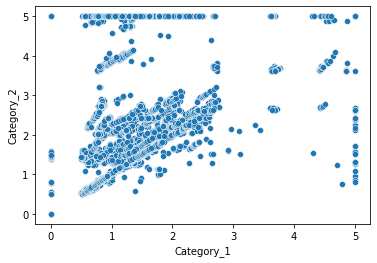

In [76]:
sns.scatterplot(x='Category_1',y='Category_2',data=df)

# Graph 2 : dist Plot

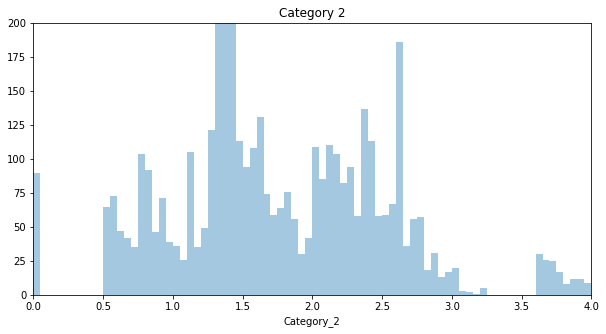

In [66]:
plt.figure(figsize=(10,5))
plt.xlim(0,4)
plt.ylim(0,200)
sns.distplot(df['Category_2'],bins=100,kde=False)
plt.title('Category 2')
plt.show()

# Graph 3: Histogram Plot

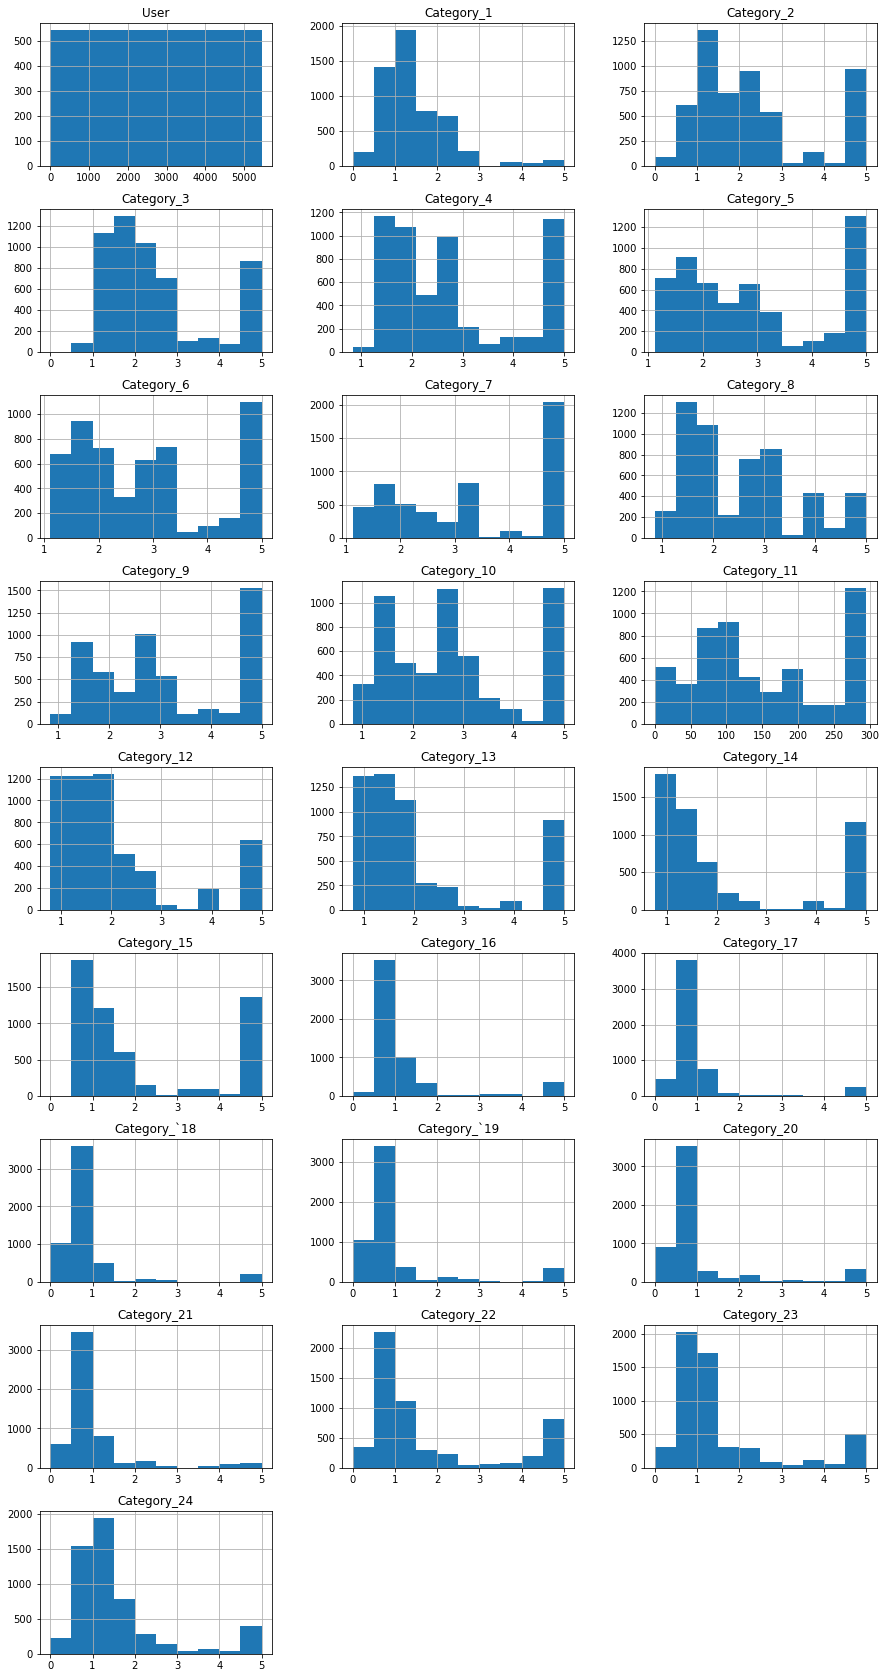

In [74]:
graph=df.hist(figsize=(15,30),layout=(9,3))

# Graph 4 : kde plot

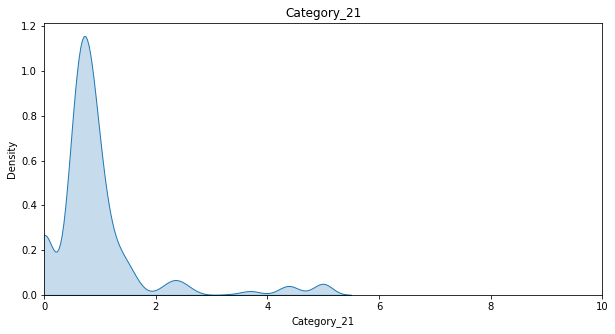

In [80]:
plt.figure(figsize=(10,5))
plt.xlim(0,10)
plt.xlabel('Category_21')
sns.kdeplot(df['Category_21'],shade=True)
plt.title('Category_21')
plt.show()

# Graph 5 : Multiple bivariate KDE plots

<AxesSubplot:xlabel='Category_2', ylabel='Category_4'>

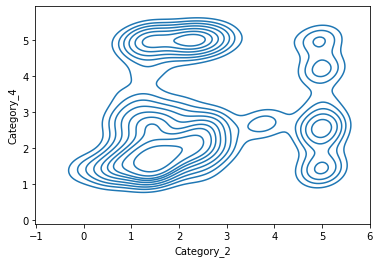

In [45]:
sns.kdeplot(data=df,x="Category_2",y="Category_4",thresh=.1)

# Graph 6 : Relplot

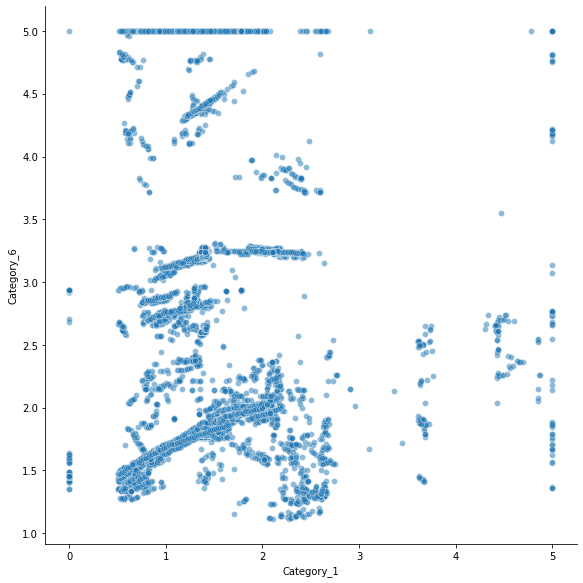

In [43]:
sns.relplot(x="Category_1", y="Category_6",alpha=.5,palette="muted",height=8,data=df)

# Data Preprocessing

The data consists of Object type, to convert object to integer, Label Encoder is Used

# Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [25]:
df['User']= LE.fit_transform(df.User)
df['Category_11']= LE.fit_transform(df.Category_11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          5456 non-null   int32  
 1   Category_1    5456 non-null   float64
 2   Category_2    5456 non-null   float64
 3   Category_3    5456 non-null   float64
 4   Category_4    5456 non-null   float64
 5   Category_5    5456 non-null   float64
 6   Category_6    5456 non-null   float64
 7   Category_7    5456 non-null   float64
 8   Category_8    5456 non-null   float64
 9   Category_9    5456 non-null   float64
 10  Category_10   5456 non-null   float64
 11  Category_11   5456 non-null   int32  
 12  Category_12   5456 non-null   float64
 13  Category_13   5456 non-null   float64
 14  Category_14   5456 non-null   float64
 15  Category_15   5456 non-null   float64
 16  Category_16   5456 non-null   float64
 17  Category_17   5456 non-null   float64
 18  Category_`18  5456 non-null 

The Data Converted to integer DataType

# Correlation

In [28]:
df_corr=df.corr()
df_corr

,User,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_`18,Category_`19,Category_20,Category_21,Category_22,Category_23,Category_24
User,1.000000,0.065130,-0.024772,0.032922,0.001548,-0.026393,-0.070982,-0.130322,-0.151406,-0.163204,-0.150156,-0.138930,-0.086212,-0.008878,0.003558,-0.003665,0.076455,0.079223,0.084086,0.087806,0.091690,0.106662,0.067315,0.018733,0.027937
Category_1,0.065130,1.000000,0.248991,0.148805,0.070692,0.035451,-0.093143,-0.264632,-0.181267,-0.290214,-0.274683,-0.251164,-0.261188,-0.178666,-0.236966,-0.134914,0.067285,0.130099,0.160360,0.180271,0.199397,0.309238,0.364375,0.407033,0.489250
Category_2,-0.024772,0.248991,1.000000,0.325011,0.167338,0.153520,0.053916,-0.050158,-0.004500,-0.050550,-0.092526,-0.219569,-0.157067,-0.213747,-0.126713,-0.066670,-0.033119,-0.077146,-0.025446,0.032529,0.096974,0.088990,0.018366,0.077616,0.125164
Category_3,0.032922,0.148805,0.325011,1.000000,0.396786,0.329925,0.161242,-0.072713,-0.186308,-0.219842,-0.179090,-0.155994,-0.235693,-0.182322,-0.162605,-0.134203,-0.022249,-0.084643,-0.119810,-0.075402,-0.009202,0.001105,0.134571,0.117458,0.082638
Category_4,0.001548,0.070692,0.167338,0.396786,1.000000,0.626868,0.315354,-0.067914,-0.128064,-0.169442,-0.115515,-0.138755,-0.166115,-0.145093,-0.308164,-0.272130,0.018274,-0.132468,-0.183849,-0.192665,-0.092453,-0.056226,0.276727,0.173550,0.090532
Category_5,-0.026393,0.035451,0.153520,0.329925,0.626868,1.000000,0.489937,0.077807,-0.002595,-0.170430,-0.100191,-0.147739,-0.104948,-0.090369,-0.280767,-0.323902,-0.056347,-0.184345,-0.243357,-0.256987,-0.191997,-0.133433,0.124431,0.128055,0.098832
Category_6,-0.070982,-0.093143,0.053916,0.161242,0.315354,0.489937,1.000000,0.382774,0.200528,0.114719,-0.019007,-0.162051,-0.163917,-0.136938,-0.153427,-0.187512,-0.149295,-0.229604,-0.271354,-0.266608,-0.227362,-0.197454,-0.090481,-0.081109,-0.066407
Category_7,-0.130322,-0.264632,-0.050158,-0.072713,-0.067914,0.077807,0.382774,1.000000,0.406959,0.432054,0.256563,0.118929,0.030872,0.025643,0.089101,0.092527,-0.142861,-0.207275,-0.226475,-0.272979,-0.232408,-0.257728,-0.360287,-0.223080,-0.247538
Category_8,-0.151406,-0.181267,-0.004500,-0.186308,-0.128064,-0.002595,0.200528,0.406959,1.000000,0.536870,0.551409,0.267512,0.003250,-0.010413,-0.021850,-0.064692,-0.124417,-0.202950,-0.236106,-0.281018,-0.254393,-0.274733,-0.255520,-0.167927,-0.137287
Category_9,-0.163204,-0.290214,-0.050550,-0.219842,-0.169442,-0.170430,0.114719,0.432054,0.536870,1.000000,0.564086,0.238056,-0.012588,0.019325,0.032260,0.126720,-0.119844,-0.229585,-0.266700,-0.271881,-0.164033,-0.185958,-0.268053,-0.268314,-0.326546


# Correlogram

# Heatmap

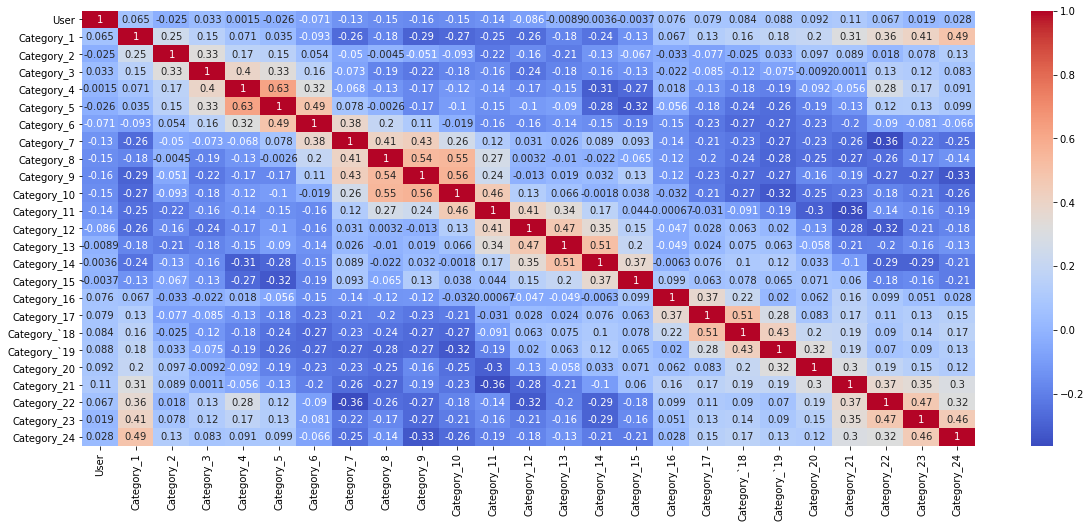

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

# Normalization

In [30]:
from sklearn.preprocessing import normalize

In [31]:
data_norm = normalize(df)
data_norm

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.96542009e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99132148e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99987814e-01, 1.89896676e-04, 1.01008870e-03, ...,
        1.01008870e-03, 1.01008870e-03, 2.24239692e-04],
       [9.99989143e-01, 1.91878345e-04, 8.18007681e-04, ...,
        1.00988603e-03, 1.00988603e-03, 2.26214470e-04],
       [9.99990862e-01, 1.91839927e-04, 8.21882635e-04, ...,
        1.00968383e-03, 1.00968383e-03, 2.36266015e-04]])

In [32]:
data_norm.shape

(5456, 25)

# Hierarchical does not work on data if its in array
# Convert Array Data to Dataframe

In [34]:
data_norm_df=pd.DataFrame(data_norm,columns=df.columns)

In [35]:
data_norm_df                     #Data After Normalization

,User,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_`18,Category_`19,Category_20,Category_21,Category_22,Category_23,Category_24
0,0.000000,0.000000,0.000000,0.039190,0.039406,0.053981,0.031525,0.053981,0.025371,0.025155,0.028502,0.993244,0.018245,0.018353,0.018569,0.018785,0.006370,0.005398,0.000000,0.005398,0.000000,0.000000,0.00000,0.00000,0.000000
1,0.996542,0.000000,0.000000,0.003256,0.003274,0.004485,0.002619,0.004485,0.002368,0.002090,0.002377,0.082522,0.001516,0.001525,0.001543,0.001561,0.000529,0.000448,0.000000,0.000448,0.000000,0.000000,0.00000,0.00000,0.000000
2,0.999132,0.000000,0.000000,0.001632,0.001632,0.002248,0.001313,0.002248,0.001187,0.001048,0.001187,0.041368,0.000760,0.000764,0.000773,0.000782,0.000265,0.000225,0.000000,0.000225,0.000000,0.000000,0.00000,0.00000,0.000000
3,0.999589,0.000000,0.000150,0.001089,0.001089,0.001500,0.000876,0.001500,0.000705,0.000699,0.000792,0.028491,0.000507,0.000510,0.000516,0.000522,0.000177,0.000150,0.000000,0.000150,0.000000,0.000000,0.00000,0.00000,0.000000
4,0.999783,0.000000,0.000000,0.000817,0.000817,0.001125,0.000657,0.001125,0.000594,0.000524,0.000594,0.020698,0.000380,0.000382,0.000387,0.000391,0.000133,0.000112,0.000000,0.000112,0.000000,0.000000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.999984,0.000184,0.001010,0.000808,0.000564,0.000560,0.000519,0.000491,0.000220,0.000358,0.000210,0.004850,0.000214,0.000261,0.000261,0.001010,0.000133,0.000131,0.000133,0.000139,0.001010,0.000212,0.00101,0.00101,0.000315
5452,0.999986,0.000188,0.001010,0.000812,0.000564,0.000562,0.000519,0.000358,0.000216,0.000356,0.000206,0.004647,0.000210,0.000257,0.000257,0.000180,0.000131,0.000129,0.000131,0.000321,0.000327,0.000214,0.00101,0.00101,0.000220
5453,0.999988,0.000190,0.001010,0.000814,0.000566,0.000562,0.000519,0.000354,0.000212,0.000354,0.000202,0.004242,0.000202,0.000218,0.000253,0.000176,0.000131,0.000127,0.000129,0.000149,0.001010,0.000216,0.00101,0.00101,0.000224
5454,0.999989,0.000192,0.000818,0.000818,0.000568,0.000564,0.000493,0.000355,0.000208,0.000351,0.000198,0.003838,0.000198,0.000214,0.000248,0.001010,0.000129,0.000127,0.000129,0.000151,0.001010,0.000218,0.00101,0.00101,0.000226


# Train Hierarchical Cluster

In [36]:
import scipy.cluster.hierarchy as Hcluster

# Technique - Agglomerative
# Method - ward

ward Suggested Method for Agglomerative

Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them:

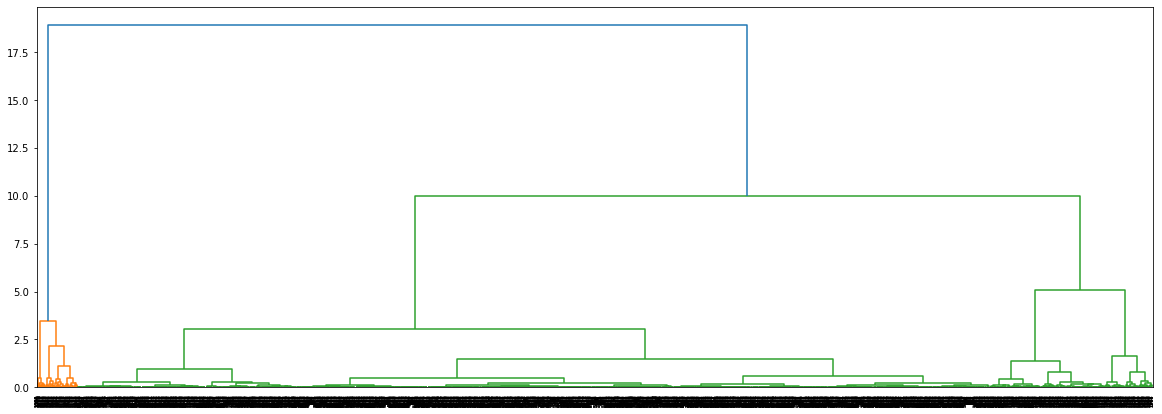

In [37]:
plt.figure(figsize=(20,7))
dendrogram=Hcluster.dendrogram(Hcluster.linkage(data_norm_df,method='ward'))

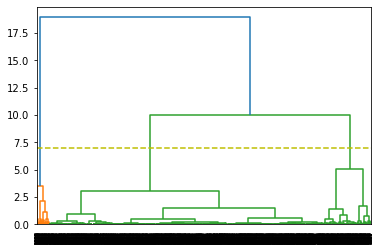

In [38]:
dendrogram = Hcluster.dendrogram(Hcluster.linkage(data_norm_df,method = 'ward'))
plt.axhline(y= 7,color ='y',linestyle='--')

# Conclusion

# By visualizing the Dendogram graph, Two Blue and Two Green lines occupies More Datas. So we can conclude that the independant variable are Grouped in to 4, Based on Training Hierarical Model Algorithm